**Introduction&Data**

The goal of the project is to determine if gender gap rate influences the fertility, basing on data from different countries. It's widely known that in general, most of highly developed countries have a low fertility rate, therefore it would be easy to find correlation between these data. Many people also associate high development with nearly perfect equality between genders, and as a result of that, loss of traditional model families, since women are able to educate theselves, work a full time job, and they no longer feel obligated to raise a group of children. However when it comes to Gender Gap ranking, there are few surprises in the first dozens,some countries with unexpectedly low or high rate according to stereotypes about them, therefore i would like to see if there exist any association so straight forward as with the HDI rank(development rank). So let me just explain little bit more about my dataset.

*Sources:*

1.https://worldpopulationreview.com/country-rankings/total-fertility-rate
The fertility rate and birth rate are used to determine a country's replacement rate and determine countries' development. The fertility rate is the average number of children born to women of childbearing age (15-44 years). To replace a current generation a rate of 2.0 is needed (when both parents die, their place in the society is filled by two kids). According to that fact we can easly understand, that countries with a lower rate than 2.0 are the countries where the population is decreasing and aging of the population is a big problem, where countries with a rate bigger than that, might me actually overpopulated or living conditions in them somehow forces to have that many of them (diseases among children, short life expectancy, lack of prevention etc...). 

2.http://www3.weforum.org/docs/WEF_GGGR_2020.pdf (page 9, general ranking)
The Gender Gap ranking is based on several criteria like on economic participation and opportunity, education attaintment, access to healthcare and political empowerment. Around 150 countries is included, because data of 12 out of 14 indicators is needed to keep adequacy of ranking. The total score is calculated and given in the range between 0 to 1, where the higher is the score, the smaller gender gap exists in the certain country. I must say, then even though first 10 from the top and the bottom is easy to guess, middle part of data is pretty interesting.

Unfortunately, I wasn't able to find Gender Gap Index from 2021, therfore data about fertility are from 2021, where Gender Gap index is from 2020, but i guess that's such a complex statistics, that a drastic changes over a year are not possible.

Taking these two data i've created a csv file and uploaded it to my github:
https://github.com/mskaa3/SADiSM/blob/main/csvData.csv
Although to get them, i needed a 'raw' version of it, thats why link used in following cell is a bit different.

Later on I will use your laboratory lessons like:
https://byes.pl/wp-content/uploads/systemy/SADiSM_lab_2_III9_13.ipynb
https://byes.pl/wp-content/uploads/systemy/SADiSM_lab_3_III23_13.ipynb
to provide a graph,linear model, svr model and glm model

In [1]:
import urllib.request
import os
import pandas as pd



urllib.request.urlretrieve("https://raw.githubusercontent.com/mskaa3/SADiSM/main/csvData.csv", 'csvData.csv')
col_names = ["Country", "Fertility Rate", "Gender Gap Rate"]
reader = pd.read_csv('csvData.csv',sep=",",skiprows=1,names=col_names,index_col=0)
reader.sample(20)



,Fertility Rate,Gender Gap Rate
Country,,
Estonia,1.7,0.751
Argentina,2.3,0.746
Honduras,2.5,0.722
Myanmar,2.2,0.665
Australia,1.7,0.731
Bahrain,2.0,0.629
Paraguay,2.4,0.683
Austria,1.5,0.744
Latvia,1.6,0.785


I would like to sort our data by both conditions, and see if there is any conclusion visible right away just by the 'ranking' created in that way.

In [2]:
genderSorted = reader.sort_values(by="Gender Gap Rate", ascending=False)
print("Sorted by gender gap rate:\n")
print(genderSorted)
fertilitySorted = reader.sort_values(by=["Fertility Rate"], ascending=False)
print("\n Sorted by fertility rate:\n")
print(fertilitySorted[::-1])

Sorted by gender gap rate:

           Fertility Rate  Gender Gap Rate
Country                                   
Iceland               1.7            0.877
Norway                1.6            0.842
Finland               1.4            0.832
Sweden                1.8            0.820
Nicaragua             1.7            0.804
...                   ...              ...
DR Congo              5.9            0.578
Syria                 2.8            0.567
Pakistan              3.5            0.564
Iraq                  3.7            0.530
Yemen                 3.8            0.494

[150 rows x 2 columns]

 Sorted by fertility rate:

             Fertility Rate  Gender Gap Rate
Country                                     
South Korea             1.0            0.672
Singapore               1.1            0.724
Malta                   1.2            0.693
Italy                   1.3            0.707
Spain                   1.3            0.795
...                     ...              ...


Apparently, none of the countries exist at the exact same places in the ranks, although in data sorted by gender gap rate, we can notice the inversed increasement of values, which seems like there would be an easy prediction of gender gap depending on fertility, but that's not the case i would like to check (i think that correlation doesn't make a lot of sense). We can try to present my dependency as a graph:

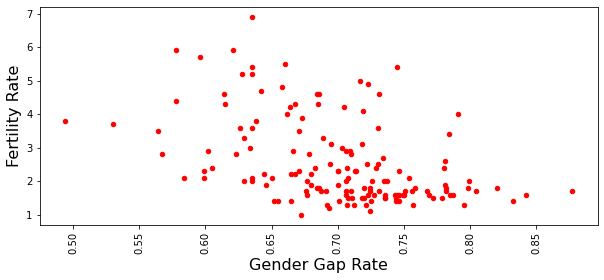

In [46]:
import matplotlib.pyplot as plt
import numpy as np


genderSorted[::-1].plot(kind='scatter',x='Gender Gap Rate',y='Fertility Rate',color='red',figsize=(10, 4))
plt.xlabel(genderSorted.columns[1], fontsize=16)
plt.ylabel(genderSorted.columns[0], fontsize=16)
plt.xticks( rotation='vertical')
plt.show()
# # if we would like to see gender gap depending on fertiliy:
# # reader.plot(kind='scatter',x='Fertility Rate',y='Gender Gap Rate',color='red',figsize=(10, 5))

# # plt.yticks( rotation='horizontal')
# # # plt.subplots_adjust(bottom=0.15)
# plt.show()

We can see definately there is a slight correlation between those, but also as I mentioned before, middle parts of the rankings are the interesting ones, because we can see a huge differentiation between results. On the other side, if we look at the begginig and ending of the x-axis, that's not a surprise. Let see if there is a linear model that might fit in here:

Model params: [-9.28301829], 9.062509278929147
Error 1.2459652489331263


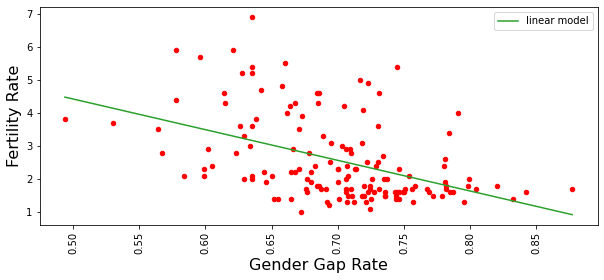

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x=genderSorted['Gender Gap Rate'].values
y=genderSorted['Fertility Rate'].values
model_lin = LinearRegression()
model_lin.fit(x.reshape(-1,1), y)
y_pred = model_lin.predict(x.reshape(-1,1))

x_min = genderSorted[::-1]['Gender Gap Rate'].min()
x_max = genderSorted[::-1]['Gender Gap Rate'].max()
x_plot = np.linspace(x_min, x_max, 300)
y_pred_plot = model_lin.predict(x_plot.reshape(-1,1))


genderSorted[::-1].plot(kind='scatter',x='Gender Gap Rate',y='Fertility Rate',color='red',figsize=(10, 4))
plt.xlabel(genderSorted.columns[1], fontsize=16)
plt.ylabel(genderSorted.columns[0], fontsize=16)
plt.xticks( rotation='vertical')
plt.plot(x_plot, y_pred_plot, color='tab:green', label='linear model')
print(f'Model params: {model_lin.coef_}, {model_lin.intercept_}')
print(f'Error {mean_squared_error(y, model_lin.predict(x.reshape(-1,1)))}')

plt.legend()
plt.show()

Of course, because of many different results it hard to find a model close to outr data, we have to remember that's just a model, and each model has bigger or smaller uncertainty. The more inconsistent data are, the harder it is to find a 'perfect' fit.  But let me say, even that model is better than nothing, at least it allows a slightly better visualisation. We can move to SVR model which stand for support vector machine.For SVR approximation problem is an optimization problem to find the narrowest tube around the surface and minimize the prediction which is the distance between the predicted and the desired outputs

Error 1.2922585382371048


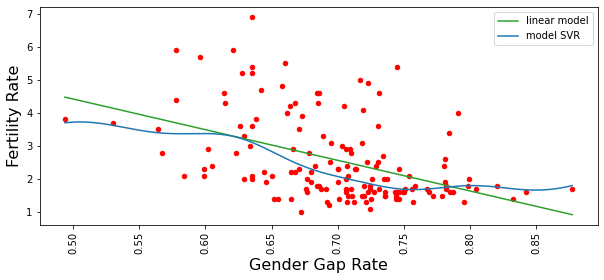

In [55]:
from sklearn.svm import SVR

model_svr = SVR().fit(x.reshape(-1,1),y)
y_pred_plot_svr = model_svr.predict(x_plot.reshape(-1,1))


genderSorted[::-1].plot(kind='scatter',x='Gender Gap Rate',y='Fertility Rate',color='red',figsize=(10, 4))
plt.xlabel(genderSorted.columns[1], fontsize=16)
plt.ylabel(genderSorted.columns[0], fontsize=16)
plt.xticks( rotation='vertical')
plt.plot(x_plot, y_pred_plot, color='tab:green', label='linear model')
plt.plot(x_plot, y_pred_plot_svr, color='tab:blue', label='model SVR')
print(f'Error {mean_squared_error(y, model_svr.predict(x.reshape(-1,1)))}')
plt.legend()
plt.show()

Model GLM params: [    0.          1698.25453092 -3581.26009178  3287.2688211
 -1113.85863364], -291.60620966559947


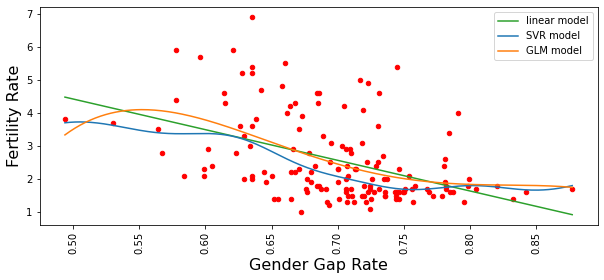

In [61]:
from sklearn.preprocessing import PolynomialFeatures


preX = PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)
Xtransformed = preX.fit_transform(x.reshape(-1,1))

model_GLM = LinearRegression()
model_GLM.fit(Xtransformed, y)

Xtransformed = preX.fit_transform(x_plot.reshape(-1,1))
y_GLM_pred_plot = model_GLM.predict(Xtransformed)

genderSorted[::-1].plot(kind='scatter',x='Gender Gap Rate',y='Fertility Rate',color='red',figsize=(10, 4))
plt.plot(x_plot, y_pred_plot, color='tab:green', label='linear model')
plt.plot(x_plot, y_pred_plot_svr, color='tab:blue', label='SVR model')
plt.plot(x_plot, y_GLM_pred_plot, label='GLM model', color='tab:orange')


plt.xlabel(genderSorted.columns[1], fontsize=16)
plt.ylabel(genderSorted.columns[0], fontsize=16)
plt.xticks( rotation='vertical')
plt.legend()
plt.show()
print(f'Model GLM params: {model_GLM.coef_}, {model_GLM.intercept_}')



Maybe that model doesn't seen ideal too, but in my opinion is the best one, because we can observe a change between 0.55 and 0.60, where obviously data are 'pulling' upwards to the higher fertility rate, and similarly around 0.70 we can see a small drop, since the results in there are much more dense, than above the line. Of course we can manipulate a degree of the polynomial and get different result as for example: 

Model GLM params: [       0.           294076.66616454 -1426689.86654711  3796342.52508387
 -5987140.22683922  5599158.48180759 -2876680.31777372   626707.40709103], -25630.433335110883


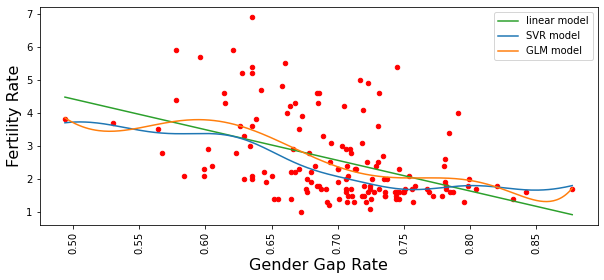

In [63]:


preX = PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)
Xtransformed = preX.fit_transform(x.reshape(-1,1))

model_GLM = LinearRegression()
model_GLM.fit(Xtransformed, y)

Xtransformed = preX.fit_transform(x_plot.reshape(-1,1))
y_GLM_pred_plot = model_GLM.predict(Xtransformed)

genderSorted[::-1].plot(kind='scatter',x='Gender Gap Rate',y='Fertility Rate',color='red',figsize=(10, 4))
plt.plot(x_plot, y_pred_plot, color='tab:green', label='linear model')
plt.plot(x_plot, y_pred_plot_svr, color='tab:blue', label='SVR model')
plt.plot(x_plot, y_GLM_pred_plot, label='GLM model', color='tab:orange')


plt.xlabel(genderSorted.columns[1], fontsize=16)
plt.ylabel(genderSorted.columns[0], fontsize=16)
plt.xticks( rotation='vertical')
plt.legend()
plt.show()
print(f'Model GLM params: {model_GLM.coef_}, {model_GLM.intercept_}')

**Conclusion:**

I think my work is a valuable piece, because it shows that model is just a model, and it's not a mirror of each particular data in the set, and that there is always a uncertainty that we have to be careful about. No metter how good  our model will be, there will be several or dozens of results which will go 'off' the line, and the whole goal is to give a better visual representation. I think that it's really important to understand how models work, not just for IT people, but to the majority of society. Then all the shared data, in television, internet would be understood better. Even looking at COVID development models-people would be complaining so much and accusing their authors of lying, if only they understood how they are made. It's impossible to take into account every single factor and make life go along with our prediction.

When it comes to my assumption about influence of gender equality on fertility, I must admit these are not exactly results I was expecting. I see there is a relation between them, but apparently not really strong. Most probably, there are many reason much more correlated with fertility, although i still think there is a slight influence in here. I guess in modern word, values of these both measurements are pretty dynamic, and maybe in 3 years these results will completely different.